## Module 5 Project: NBA Position Clustering

Please fill out:  
  Student name: Gabriel Blatstein  
  Student pace: Part Time  
  Scheduled project review date/time:  
  Instructor name: Brandon Lewis    
  Blog post URL:XXXXX


Proposal:  
I would like to use NBA stats data from NBA.com to train a model that will classify a players position given historical stats. Due to the NBA shifting into a position-less basketball style of play, I think this would be a interesting topic to research.    

I plan to use K-Means Non-Heirarchical to accomplish this. The reason behind this algo is because we know there are only 5 positions in the NBA: PG, SG, SF, PF, C.

I decided to first use data that was already available to me through Kaggle and other internet resources. I wanted to focus on figuring out the parameters of the model and also focus on the machine learning aspect.  

Through research I found a great excel data set that has every player in the NBA dating back to 1950.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
raw_df=pd.read_csv('/Users/gabrielblatstein/Downloads/nba-players-stats/Seasons_Stats.csv')
raw_df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
Unnamed: 0    24691 non-null int64
Year          24624 non-null float64
Player        24624 non-null object
Pos           24624 non-null object
Age           24616 non-null float64
Tm            24624 non-null object
G             24624 non-null float64
GS            18233 non-null float64
MP            24138 non-null float64
PER           24101 non-null float64
TS%           24538 non-null float64
3PAr          18839 non-null float64
FTr           24525 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21571 non-null float64
AST%          22555 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
blanl         0 non-null float64
OWS           24585 non-null float64
DWS           24585 non-null float64
WS          

In [4]:
raw_df.isna().sum()

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


In [5]:
raw_df['blank2'].unique()

array([nan])

In [6]:
raw_df['blanl'].unique()

array([nan])

In [7]:
raw_df= raw_df.drop(['blanl', 'blank2', 'Unnamed: 0'], axis= 1)

Due to the evolving style of play in the NBA, I decided to split up the dataset. I researched the NBA rule changes and things like when certain positions were introduced.  For example, guard use to be a position, but currently there is a shooting guard or a point guard. The same goes for Forward, as today we have Power Forward and Small Forward. 

Other key dates are outlined below:

1946-1956: There were two independent leagues the Basketball Association of America (BAA) and the National Basketball League (NBL). The NBL merged in 1949 with the BAA and the a new name was coined, the National Basketball Association (NBA). 

1956-1979: The Celtics dominated this time period with the likes of Bill Russel winning 8 straight championships. During the years of 1966 to 1968 the NBA expanded from 9 to 14 teams during this time period. Then in slowly but surely teams were added throughout the years to reach a total of 22 teams in 1977.

1979-1998: The three point line was added from the ABA in 1979. This kicked off the rivalry of Larry Bird (Celtic) and Magic Johnson (Laker) for the next ten years battled for 8 titles in total. Jordan enters the league in 1984, and then four years later(1988) four more teams were added brining the total to 27. Jordan led the Bulls to two 3-peat championships during eight seasons. This led to the term of dynasties that started to form over the next decade.

1998-2014: The Lakers and Spurs over this time period formed two separate dynasties. The Spurs or Lakers combined to make 13 Finals in 16 seasons, with 10 titles amongst each other. The Lakers dynasty was led by the great Kobe Bryant and Shaquille O'Neal. On the other end, the Spurs dynasty was highlighted by Tim Duncan and David Robinson. In 2007, Lebron James and the Cavaliers were swept by the Spurs, with the Spurs once again asserting their dynasty dominance. 

At the start of the 2010-2011 season, the league was shocked by the Decision. Lebron James decided to take his talents to South Beach Miami to join Dwayne Wade and newly signed Chris Bosh. Lebron would go on to win two championships with the Miami Heat along with starting his record setting 8 NBA finals appearances. 

2014-Present: Just like the Celtics and Laker rivalry, a new rivalry formed. When Lebron decided in 2014 to go back to the city of Cleveland and bring a championship to Cleveland, a new rivalry was formed. The Cavaliers led by Lebron would face off with the Warriors led by Steph Curry and Klay Thompson in the 2014-2015, 2015-2016, 2017-2018. In the 2015-2016 Lebron James brought Cleveland's first NBA championship to the city to end their championship drought. Lebron then decided to take his talents to the Lakers at the start of the 2018 NBA season. 

The Warriors dynasty finally came to a end when Kevin Durant went down with two injuries in the 2019 finals against Kwahi Leonard and the Toronto Raptors. The Raptors took advantage of a injured Warriors squad and won the 2019 finals. Kevin Durant then decided to move teams to the Brooklyn Nets to join forces with Kyrie Irving. The NBA is now very shaken up and will be a very exciting. 



In [8]:
NBA_1950_1956= raw_df[raw_df['Year']<1957]
NBA_1957_1979= raw_df[(raw_df['Year']>1956)&(raw_df['Year']<1980)]
NBA_1980_1998= raw_df[(raw_df['Year']>1979)&(raw_df['Year']<1999)]
NBA_1999_2017= raw_df[raw_df['Year']>1998]

Function Definitions

In [9]:
def Position_num(df):    
    df.at[df['Pos']=='PG', 'Pos'] = 1
    df.at[df['Pos']=='PG-SG','Pos']= 1
    df.at[df['Pos']=='PG-SF', 'Pos']= 1
    df.at[df['Pos']=='SG', 'Pos']= 2
    df.at[df['Pos']=='SG-PG', 'Pos']= 2
    df.at[df['Pos']=='SG-SF', 'Pos']= 2
    df.at[df['Pos']=='G', 'Pos']= 2
    df.at[df['Pos']=='SF', 'Pos']= 3
    df.at[df['Pos']=='SF-PG', 'Pos']= 3
    df.at[df['Pos']=='SF-PF', 'Pos']= 3
    df.at[df['Pos']=='SF-SG', 'Pos']= 3
    df.at[df['Pos']=='F-G', 'Pos']= 3
    df.at[df['Pos']=='F', 'Pos']= 3
    df.at[df['Pos']=='G-F', 'Pos']= 3
    df.at[df['Pos']=='PF', 'Pos']= 4
    df.at[df['Pos']=='F-C', 'Pos']= 4
    df.at[df['Pos']=='PF-SF', 'Pos']= 4
    df.at[df['Pos']=='SG-PF', 'Pos']= 4
    df.at[df['Pos']=='C', 'Pos']= 5
    df.at[df['Pos']=='C-F', 'Pos']= 5
    df.at[df['Pos']=='C-SF', 'Pos']= 5
    df.at[df['Pos']=='PF-C', 'Pos']= 6
    df.at[df['Pos']=='C-PF', 'Pos']= 6
    df.at[df['Pos']=='C-SF', 'Pos']= 6
#     df.astype

In [10]:
# def kmeans(data,clusters):
#     kmeans= KMeans(n_clusters=5)
#     kmeans.fit(data)
#     y_hat= kmeans.predict(data)
#     labels = kmeans.labels_
#     return metrics.silhouette_score(data, labels, metric='euclidean')

# Might not need because it is not classification?

In [11]:
def train_test(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
    

In [12]:
def random_forest(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
    clf= RandomForestClassifier()
    clf.fit(X_train, y_train)
    preds= clf.predict(X_test)
    acc = round(accuracy_score(preds, y_test) * 100,2)
    print("Accuracy is :{0}%".format(acc))
    feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
    feat_importances.plot(kind='barh')
    plt.show()
    return pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])

## Modeling NBA Years

### Background on Different Algorithms Covered

Supervised classification machine learning can be broken down into two very basic categories, Binary classifiers and Multi-Class classifiers:

    -Binary classifiers: Classification with only two distinct classes or the problem has only two outcomes  
        Examples: Male/Female, author of a book, and basketball shot miss vs. made basket  
    -Multi-Class classifiers: Classification with more than two distinct classes  
        Examples: sport positions, mood/feelings in music, and stock sectors   


There are a plethora of machine learning algorithms that can be used for basic classification problems. I will cover the XXXX (INSERT NUMBER) of algorithms used in this notebook.  

1. Decision Trees: is a DAG type of classifier where each branch node represents a choice between a number of alternatives and each leaf node represents a classification.  
 -Greedy search: it is a exhaustive search that will perform top-down until all possible decision trees have been created
 -At each tree split, the model tries to maximize the entropy, meaning splitting the data on criteria that will provide the most information gain.  
 -Advantages: Simple to understand and visualize, requires very little data preparation, and can handle both categorical and numerical data  
 -Disadvantages: Trees can become too complex, and are susceptible to small variations in data cause a completely different tree  
 
2. Random Forest: is an ensemble model that creates multiple trees and classifies objects based on the aggregated votes of all the trees.
 -Randomly selects a subset of features to use as predictors for each node of the decision trees  
 -Uses sub-sampling and bagging to creates a model resilient to overfitting  
 -Advantages: Strong performance due to the resilience to noise/variance, can handle missing data while maintaining accuracy, and friendly to large data set with high dimensionality.  
 -Disadvantages: User does not have control over what the model does, in this sense it is a black box   
3. AdaBoost: each learner is trained on sub-sample of data and weights are assigned. As the learners correctly identify a data point the weight is reduced.   
 -Creates a new classifier by continually influencing the distribution of the data sampled to rain each successive learner
 -Advantages: Less parameter tuning, feature selection, resilient to overfitting
 -Disadvantages: Sensitive to noisy data and outliers, and better algos exist
4. K-Nearest Neighbor: is a supervised learning algorithm that uses a distance metric to classify similar data together.   
 -Using the labels of the closest points, this determines what the model will label the unlabeled data point  
 -Selecting the value of K is very important and generally is a odd number due to tie breakers  
 -As K decreases, the predictions become less stable, and as K increases, the predictions become more stable 
 -Advantages: Simple and easy to implement, and no additional work is needed(aka no parameter tuning)  
 -Disadvantages: The algorithm gets very slow as you increase the number of examples, predictors, and or independent variables.  



### NBA 1950-1956 

In [15]:
NBA_1950_1956.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122 entries, 0 to 1127
Data columns (total 50 columns):
Year      1122 non-null float64
Player    1122 non-null object
Pos       1122 non-null object
Age       1115 non-null float64
Tm        1122 non-null object
G         1122 non-null float64
GS        0 non-null float64
MP        636 non-null float64
PER       615 non-null float64
TS%       1121 non-null float64
3PAr      0 non-null float64
FTr       1121 non-null float64
ORB%      0 non-null float64
DRB%      0 non-null float64
TRB%      0 non-null float64
AST%      0 non-null float64
STL%      0 non-null float64
BLK%      0 non-null float64
TOV%      0 non-null float64
USG%      0 non-null float64
OWS       1094 non-null float64
DWS       1094 non-null float64
WS        1094 non-null float64
WS/48     615 non-null float64
OBPM      0 non-null float64
DBPM      0 non-null float64
BPM       0 non-null float64
VORP      0 non-null float64
FG        1122 non-null float64
FGA       112

In [16]:
NBA_1950_1956.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [17]:
NBA_1950_1956.isna().sum()

Year         0
Player       0
Pos          0
Age          7
Tm           0
G            0
GS        1122
MP         486
PER        507
TS%          1
3PAr      1122
FTr          1
ORB%      1122
DRB%      1122
TRB%      1122
AST%      1122
STL%      1122
BLK%      1122
TOV%      1122
USG%      1122
OWS         28
DWS         28
WS          28
WS/48      507
OBPM      1122
DBPM      1122
BPM       1122
VORP      1122
FG           0
FGA          0
FG%          1
3P        1122
3PA       1122
3P%       1122
2P           0
2PA          0
2P%          1
eFG%         1
FT           0
FTA          0
FT%         13
ORB       1122
DRB       1122
TRB        312
AST          0
STL       1122
BLK       1122
TOV       1122
PF           0
PTS          0
dtype: int64

In [18]:
NBA_1950_1956= NBA_1950_1956.drop(['TOV','STL','BLK','TRB','DRB','ORB','GS','3PAr','ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%','USG%','OBPM','DBPM','BPM','VORP','3P','3PA','3P%'],axis=1)
     

In [19]:
NBA_1950_1956.isna().sum()

Year        0
Player      0
Pos         0
Age         7
Tm          0
G           0
MP        486
PER       507
TS%         1
FTr         1
OWS        28
DWS        28
WS         28
WS/48     507
FG          0
FGA         0
FG%         1
2P          0
2PA         0
2P%         1
eFG%        1
FT          0
FTA         0
FT%        13
AST         0
PF          0
PTS         0
dtype: int64

The missing values or NaN can be attributed to a few things, either a player never attempted or had said stat or the stat did not exist back in the day. We will fill in 0 for stats like FT% where a player just never took a free throw. I do not want to get rid of half the data due to a Nan 

In [20]:
NBA_1950_1956= NBA_1950_1956.fillna(0)
NBA_1950_1956.isna().sum()

Year      0
Player    0
Pos       0
Age       0
Tm        0
G         0
MP        0
PER       0
TS%       0
FTr       0
OWS       0
DWS       0
WS        0
WS/48     0
FG        0
FGA       0
FG%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
AST       0
PF        0
PTS       0
dtype: int64

In [21]:
Position_num(NBA_1950_1956)
NBA_1950_1956.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122 entries, 0 to 1127
Data columns (total 27 columns):
Year      1122 non-null float64
Player    1122 non-null object
Pos       1122 non-null int64
Age       1122 non-null float64
Tm        1122 non-null object
G         1122 non-null float64
MP        1122 non-null float64
PER       1122 non-null float64
TS%       1122 non-null float64
FTr       1122 non-null float64
OWS       1122 non-null float64
DWS       1122 non-null float64
WS        1122 non-null float64
WS/48     1122 non-null float64
FG        1122 non-null float64
FGA       1122 non-null float64
FG%       1122 non-null float64
2P        1122 non-null float64
2PA       1122 non-null float64
2P%       1122 non-null float64
eFG%      1122 non-null float64
FT        1122 non-null float64
FTA       1122 non-null float64
FT%       1122 non-null float64
AST       1122 non-null float64
PF        1122 non-null float64
PTS       1122 non-null float64
dtypes: float64(24), int64(1), ob

/Users/gabrielblatstein/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [22]:
X=NBA_1950_1956.drop(['Pos','Year','Tm','Player'], axis=1)
y=NBA_1950_1956['Pos']

/Users/gabrielblatstein/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is :37.78%


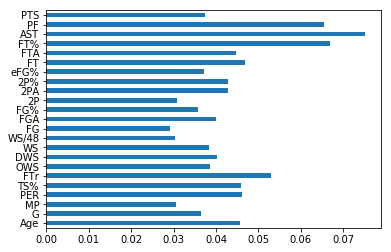

Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,11,8,8,1,1
2,6,17,19,6,4
3,3,15,29,5,6
4,1,9,20,18,3
5,3,3,12,7,10


In [25]:
random_forest(X,y)

In [50]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [33]:
adaboost_clf = AdaBoostClassifier()
adaboost_mean_cv_score = np.mean(cross_val_score(adaboost_clf, X, y, cv=3))
print("Mean Cross Validation Score for AdaBoost: {:.4}%".format(adaboost_mean_cv_score * 100))

Mean Cross Validation Score for AdaBoost: 33.96%


In [47]:
adaboost_param_grid = {
    'n_estimators': [75, 80, 100, 250],
    'learning_rate': [1.0, .25 ,0.5, 0.1]
}

In [51]:
adaboost_grid_search = GridSearchCV(adaboost_clf, adaboost_param_grid, cv=3)
adaboost_grid_search.fit(X_scaled, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [75, 80, 100, 250], 'learning_rate': [1.0, 0.25, 0.5, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
print("Testing Accuracy: {:.4}%".format(adaboost_grid_search.best_score_ * 100))
print("Optimal Parameters: {}".format(adaboost_grid_search.best_params_))

Testing Accuracy: 36.1%
Optimal Parameters: {'learning_rate': 0.5, 'n_estimators': 75}


FEATURE SELECTION

In [22]:
# kmeans(X,5)

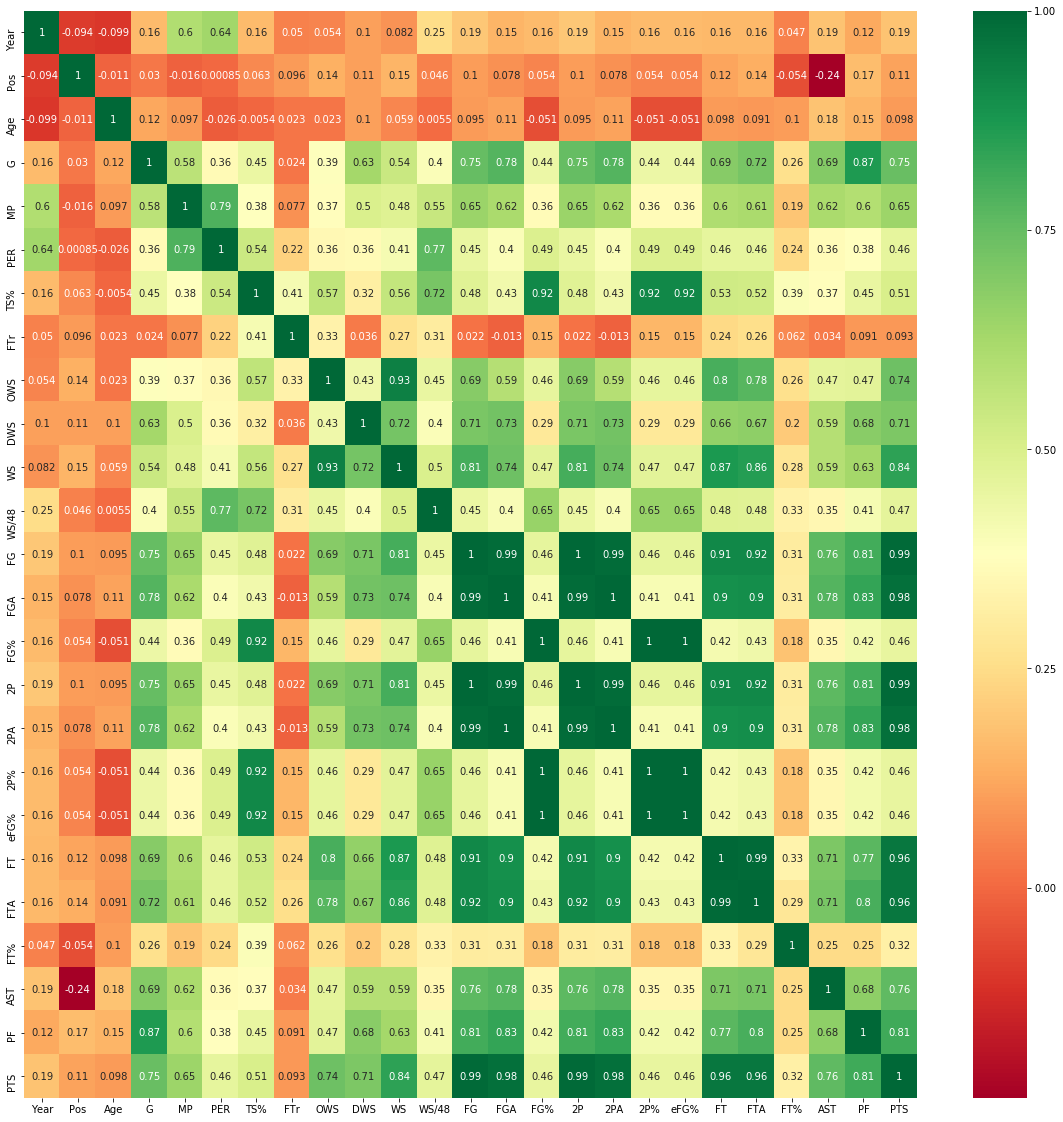

In [24]:
#get correlations of each features in dataset
corrmat = NBA_1950_1956.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(NBA_1950_1956[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [96]:
random_forest(X,y)

Accuracy is :38.67%
[0.14102945 0.1230186  0.12031167 0.10901836 0.07611562 0.09467183
 0.08756814 0.07336382 0.07778432 0.0971182 ]


/Users/gabrielblatstein/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,9,12,5,1,2
2,3,16,24,3,2
3,4,13,36,17,7
4,1,6,14,8,7
5,0,2,9,6,18


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
clf= RandomForestClassifier()
clf.fit(X_train, y_train)
preds= clf.predict(X_test)
acc = round(accuracy_score(preds, y_test) * 100,2)
print("Accuracy is :{0}%".format(acc))
print(clf.feature_importances_)
pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])

Accuracy is :37.78%
[0.04548597 0.03766634 0.03543513 0.04283331 0.04023476 0.04925989
 0.03854984 0.03735689 0.03922531 0.03266559 0.02831745 0.03676945
 0.04404171 0.03236144 0.03860767 0.04357189 0.04624859 0.04613654
 0.03992527 0.06157205 0.08104184 0.06311113 0.03958192]


/Users/gabrielblatstein/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,16,3,7,5,2
2,8,19,20,6,1
3,5,22,32,7,5
4,1,5,11,12,6
5,0,6,11,9,6


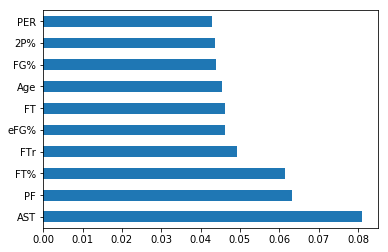

In [40]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

In [48]:
feat_importances.nlargest(10).index

Index(['AST', 'PF', 'FT%', 'FTr', 'eFG%', 'FT', 'Age', 'FG%', '2P%', 'PER'], dtype='object')

In [51]:
NBA_1950_10_feats=NBA_1950_1956[['AST', 'PF', 'FT%', 'FTr', 'eFG%', 'FT', 'Age', 'FG%', '2P%', 'PER']]

In [53]:
X=NBA_1950_10_feats




In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
clf= RandomForestClassifier()
clf.fit(X_train, y_train)
preds= clf.predict(X_test)
acc = round(accuracy_score(preds, y_test) * 100,2)
print("Accuracy is :{0}%".format(acc))

Accuracy is :36.44%


/Users/gabrielblatstein/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [55]:
X

,AST,PF,FT%,FTr,eFG%,FT,Age,FG%,2P%,PER
0,176.0,217.0,0.705,0.467,0.279,170.0,31.0,0.279,0.279,0.0
1,109.0,99.0,0.708,0.387,0.372,75.0,29.0,0.372,0.372,0.0
2,140.0,192.0,0.698,0.259,0.349,90.0,25.0,0.349,0.349,0.0
3,20.0,29.0,0.559,0.395,0.256,19.0,24.0,0.256,0.256,0.0
4,20.0,27.0,0.548,0.378,0.256,17.0,24.0,0.256,0.256,0.0
5,0.0,2.0,0.667,0.750,0.250,2.0,24.0,0.250,0.250,0.0
6,233.0,132.0,0.762,0.301,0.363,215.0,22.0,0.363,0.363,0.0
7,2.0,6.0,0.000,0.313,0.313,0.0,23.0,0.313,0.313,0.0
8,163.0,273.0,0.651,0.395,0.278,209.0,28.0,0.278,0.278,0.0
9,75.0,140.0,0.632,0.480,0.287,132.0,28.0,0.287,0.287,0.0


In [67]:

scaler=StandardScaler()
X_scaled= scaler.fit_transform(X)
pca_1 = PCA(n_components=5)
pca_2 = PCA(n_components=6)
pca_3 = PCA(n_components=7)

principalComponents = pca_1.fit_transform(X_scaled)
principalComponents = pca_2.fit_transform(X_scaled)
principalComponents = pca_3.fit_transform(X_scaled)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_scaled)
print(np.sum(pca.explained_variance_ratio_))

0.8577075111566983
0.8962022455644307
0.925162751810421
0.8577075111566986


In [ ]:
print(model.feature_importances_)

In [60]:
pipe_rf = Pipeline([('pca', PCA(n_components=10, random_state=123)),
         ('clf', RandomForestClassifier(n_estimators=7,random_state=123))])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

param_grid_forest = [ 
  {'clf__n_estimators': [10,15,20],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [10, 15, 20],  
   'clf__min_samples_leaf':[50],  
   'clf__min_samples_split':[0.05 ,0.1, 0.2],
   'clf__max_features':[10]
  }
]
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] clf__criterion=entropy, clf__max_depth=10, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=10, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=10, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=10, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=10, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=10, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.0s
[CV] clf__c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  clf__criterion=entropy, clf__max_depth=10, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=15, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=10, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=15 
[CV]  clf__criterion=entropy, clf__max_depth=10, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=15, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=10, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=20 
[CV]  clf__criterion=entropy, clf__max_depth=10, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=20, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=10, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=20 
[CV]  clf__criterion=entropy, clf__max_depth=10, clf__max_features=10, cl

[CV]  clf__criterion=entropy, clf__max_depth=15, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=15, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=15, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=15 
[CV]  clf__criterion=entropy, clf__max_depth=15, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=15, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=15, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=20 
[CV]  clf__criterion=entropy, clf__max_depth=15, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=20, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=15, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=20 
[CV]  clf__criterion=entropy, clf__max_depth=15, clf__max_features=10, cl

[CV]  clf__criterion=entropy, clf__max_depth=20, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=15, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=20, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=20 
[CV]  clf__criterion=entropy, clf__max_depth=20, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=20, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=20, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=20 
[CV]  clf__criterion=entropy, clf__max_depth=20, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=20, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=20, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=20 
[CV]  clf__criterion=entropy, clf__max_depth=20, clf__max_features=10, cl

[CV]  clf__criterion=gini, clf__max_depth=10, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.05, clf__n_estimators=20, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=10, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.1, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=10, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.1, clf__n_estimators=10, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=10, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.1, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=10, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.1, clf__n_estimators=10, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=10, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.1, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=10, clf__max_features=10, clf__min_samples_leaf=50, cl

[CV]  clf__criterion=gini, clf__max_depth=15, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.1, clf__n_estimators=10, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=15, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.1, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=15, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.1, clf__n_estimators=10, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=15, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.1, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=15, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.1, clf__n_estimators=10, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=15, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.1, clf__n_estimators=15 
[CV]  clf__criterion=gini, clf__max_depth=15, clf__max_features=10, clf__min_samples_leaf=50, clf

[CV]  clf__criterion=gini, clf__max_depth=20, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.1, clf__n_estimators=15, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=20, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.1, clf__n_estimators=15 
[CV]  clf__criterion=gini, clf__max_depth=20, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.1, clf__n_estimators=15, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=20, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.1, clf__n_estimators=15 
[CV]  clf__criterion=gini, clf__max_depth=20, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.1, clf__n_estimators=15, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=20, clf__max_features=10, clf__min_samples_leaf=50, clf__min_samples_split=0.1, clf__n_estimators=20 
[CV]  clf__criterion=gini, clf__max_depth=20, clf__max_features=10, clf__min_samples_leaf=50, clf

[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:    7.3s finished


In [59]:

# Construct pipeline
pipe_ab = Pipeline([('pca', PCA(n_components=9)),
            ('clf', AdaBoostClassifier(random_state = 0))])

# Set grid search params
adaboost_param_grid = {
    'clf__n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13],
    'clf__learning_rate': [1.0, 0.5, 0.1]
}

# Construct grid search
gs_ab = GridSearchCV(estimator=pipe_ab,
            param_grid=adaboost_param_grid,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_ab.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_ab.best_score_)

# Best params
print('\nBest params:\n', gs_ab.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] clf__learning_rate=1.0, clf__n_estimators=5 .....................
[CV] ...... clf__learning_rate=1.0, clf__n_estimators=5, total=   0.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=5 .....................
[CV] ...... clf__learning_rate=1.0, clf__n_estimators=5, total=   0.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=5 .....................
[CV] ...... clf__learning_rate=1.0, clf__n_estimators=5, total=   0.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=6 .....................
[CV] ...... clf__learning_rate=1.0, clf__n_estimators=6, total=   0.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=6 .....................
[CV] ...... clf__learning_rate=1.0, clf__n_estimators=6, total=   0.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=6 .....................
[CV] ...... clf__learning_rate=1.0, clf__n_estimators=6, total=   0.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=7 .....................
[CV] ...... clf_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...... clf__learning_rate=1.0, clf__n_estimators=7, total=   0.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=8 .....................
[CV] ...... clf__learning_rate=1.0, clf__n_estimators=8, total=   0.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=8 .....................
[CV] ...... clf__learning_rate=1.0, clf__n_estimators=8, total=   0.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=8 .....................
[CV] ...... clf__learning_rate=1.0, clf__n_estimators=8, total=   0.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=9 .....................
[CV] ...... clf__learning_rate=1.0, clf__n_estimators=9, total=   0.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=9 .....................
[CV] ...... clf__learning_rate=1.0, clf__n_estimators=9, total=   0.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=9 .....................
[CV] ...... clf__learning_rate=1.0, clf__n_estimators=9, total=   0.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=10 ....................
[CV] .

[CV] ...... clf__learning_rate=0.1, clf__n_estimators=9, total=   0.0s
[CV] clf__learning_rate=0.1, clf__n_estimators=9 .....................
[CV] ...... clf__learning_rate=0.1, clf__n_estimators=9, total=   0.0s
[CV] clf__learning_rate=0.1, clf__n_estimators=10 ....................
[CV] ..... clf__learning_rate=0.1, clf__n_estimators=10, total=   0.0s
[CV] clf__learning_rate=0.1, clf__n_estimators=10 ....................
[CV] ..... clf__learning_rate=0.1, clf__n_estimators=10, total=   0.0s
[CV] clf__learning_rate=0.1, clf__n_estimators=10 ....................
[CV] ..... clf__learning_rate=0.1, clf__n_estimators=10, total=   0.0s
[CV] clf__learning_rate=0.1, clf__n_estimators=11 ....................
[CV] ..... clf__learning_rate=0.1, clf__n_estimators=11, total=   0.0s
[CV] clf__learning_rate=0.1, clf__n_estimators=11 ....................
[CV] ..... clf__learning_rate=0.1, clf__n_estimators=11, total=   0.0s
[CV] clf__learning_rate=0.1, clf__n_estimators=11 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    2.4s finished
/Users/gabrielblatstein/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### NBA 1957-1979

In [26]:
NBA_1957_1979.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1129,1957.0,Forest Able,G,24.0,SYR,1.0,NaN,1.0,-41.1,0.000,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,0.0
1130,1957.0,Paul Arizin*,SF,28.0,PHW,71.0,NaN,2767.0,22.2,0.515,...,0.829,NaN,NaN,561.0,150.0,NaN,NaN,NaN,274.0,1817.0
1131,1957.0,Bob Armstrong,C-F,23.0,PHW,19.0,NaN,110.0,7.8,0.331,...,0.500,NaN,NaN,39.0,3.0,NaN,NaN,NaN,13.0,28.0
1132,1957.0,Jim Baechtold,SF,29.0,NYK,45.0,NaN,462.0,15.3,0.458,...,0.750,NaN,NaN,80.0,33.0,NaN,NaN,NaN,39.0,216.0
1133,1957.0,John Barber,F,29.0,STL,5.0,NaN,19.0,4.2,0.329,...,0.500,NaN,NaN,6.0,0.0,NaN,NaN,NaN,4.0,7.0


In [27]:
NBA_1957_1979.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4575 entries, 1129 to 5725
Data columns (total 50 columns):
Year      4575 non-null float64
Player    4575 non-null object
Pos       4575 non-null object
Age       4574 non-null float64
Tm        4575 non-null object
G         4575 non-null float64
GS        0 non-null float64
MP        4575 non-null float64
PER       4564 non-null float64
TS%       4566 non-null float64
3PAr      0 non-null float64
FTr       4565 non-null float64
ORB%      1870 non-null float64
DRB%      1870 non-null float64
TRB%      2649 non-null float64
AST%      3633 non-null float64
STL%      1870 non-null float64
BLK%      1870 non-null float64
TOV%      716 non-null float64
USG%      718 non-null float64
OWS       4564 non-null float64
DWS       4564 non-null float64
WS        4564 non-null float64
WS/48     4564 non-null float64
OBPM      1870 non-null float64
DBPM      1870 non-null float64
BPM       1870 non-null float64
VORP      1870 non-null float64
FG   

In [28]:
NBA_1957_1979.isna().sum()

Year         0
Player       0
Pos          0
Age          1
Tm           0
G            0
GS        4575
MP           0
PER         11
TS%          9
3PAr      4575
FTr         10
ORB%      2705
DRB%      2705
TRB%      1926
AST%       942
STL%      2705
BLK%      2705
TOV%      3859
USG%      3857
OWS         11
DWS         11
WS          11
WS/48       11
OBPM      2705
DBPM      2705
BPM       2705
VORP      2705
FG           0
FGA          0
FG%         10
3P        4575
3PA       4575
3P%       4575
2P           0
2PA          0
2P%         10
eFG%        10
FT           0
FTA          0
FT%        100
ORB       2705
DRB       2705
TRB          0
AST          0
STL       2705
BLK       2705
TOV       3857
PF           0
PTS          0
dtype: int64

In [29]:
NBA_1957_1979=NBA_1957_1979.drop(['3P','3PA','3P%','3PAr','GS','ORB%','DRB%','TOV','BLK','STL','DRB','ORB','VORP','BPM','DBPM','OBPM','TRB','STL%','BLK%','TOV%','USG%'], axis=1)

In [30]:
NBA_1957_1979.isna().sum()

Year         0
Player       0
Pos          0
Age          1
Tm           0
G            0
MP           0
PER         11
TS%          9
FTr         10
TRB%      1926
AST%       942
OWS         11
DWS         11
WS          11
WS/48       11
FG           0
FGA          0
FG%         10
2P           0
2PA          0
2P%         10
eFG%        10
FT           0
FTA          0
FT%        100
AST          0
PF           0
PTS          0
dtype: int64

In [31]:
NBA_1957_1979=NBA_1957_1979.fillna(0)

In [32]:
NBA_1957_1979.isna().sum()

Year      0
Player    0
Pos       0
Age       0
Tm        0
G         0
MP        0
PER       0
TS%       0
FTr       0
TRB%      0
AST%      0
OWS       0
DWS       0
WS        0
WS/48     0
FG        0
FGA       0
FG%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
AST       0
PF        0
PTS       0
dtype: int64

/Users/gabrielblatstein/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is :50.27%


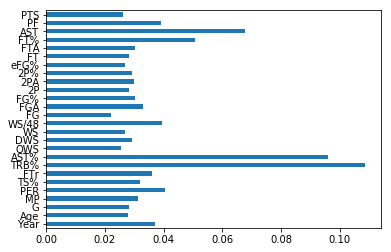

Predicted Result,C,C-F,C-PF,C-SF,F,G,PF,PG,SF,SG
Actual Result,,,,,,,,,,
C,103,0,1,1,0,1,52,5,23,5
C-F,0,0,0,0,0,0,0,0,0,1
C-PF,1,0,0,0,0,0,0,0,0,0
F,1,0,0,0,0,1,2,1,3,0
F-G,0,0,0,0,0,0,2,1,0,0
G,3,0,0,0,1,0,1,1,1,2
G-F,0,0,0,0,0,0,0,1,1,1
PF,49,0,0,0,1,0,55,2,31,8
PF-SF,0,0,0,0,0,0,2,0,0,0


In [34]:
X= NBA_1957_1979.drop(['Tm','Player','Pos'], axis=1)
y= NBA_1957_1979['Pos']
random_forest(X,y)

### NBA 1980-1998

In [35]:
NBA_1980_1998.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,0.524,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


In [36]:
NBA_1980_1998.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8216 entries, 5727 to 13960
Data columns (total 50 columns):
Year      8216 non-null float64
Player    8216 non-null object
Pos       8216 non-null object
Age       8216 non-null float64
Tm        8216 non-null object
G         8216 non-null float64
GS        7522 non-null float64
MP        8216 non-null float64
PER       8216 non-null float64
TS%       8193 non-null float64
3PAr      8185 non-null float64
FTr       8185 non-null float64
ORB%      8216 non-null float64
DRB%      8216 non-null float64
TRB%      8216 non-null float64
AST%      8216 non-null float64
STL%      8216 non-null float64
BLK%      8216 non-null float64
TOV%      8198 non-null float64
USG%      8216 non-null float64
OWS       8216 non-null float64
DWS       8216 non-null float64
WS        8216 non-null float64
WS/48     8216 non-null float64
OBPM      8216 non-null float64
DBPM      8216 non-null float64
BPM       8216 non-null float64
VORP      8216 non-null floa

In [37]:
NBA_1980_1998.isna().sum()

Year         0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS         694
MP           0
PER          0
TS%         23
3PAr        31
FTr         31
ORB%         0
DRB%         0
TRB%         0
AST%         0
STL%         0
BLK%         0
TOV%        18
USG%         0
OWS          0
DWS          0
WS           0
WS/48        0
OBPM         0
DBPM         0
BPM          0
VORP         0
FG           0
FGA          0
FG%         31
3P           0
3PA          0
3P%       1635
2P           0
2PA          0
2P%         37
eFG%        31
FT           0
FTA          0
FT%        267
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
dtype: int64

In [38]:
NBA_1980_1998.fillna(0, inplace=True)

/Users/gabrielblatstein/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


/Users/gabrielblatstein/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is :62.71%


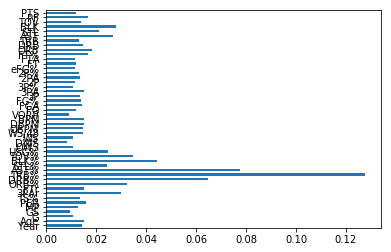

Predicted Result,C,PF,PF-C,PG,SF,SG
Actual Result,,,,,,
C,205,93,0,2,14,6
C-PF,1,0,0,0,0,0
PF,109,170,1,1,49,3
PF-C,1,1,0,0,0,0
PF-SF,0,1,0,0,0,0
PG,3,2,0,284,8,38
SF,13,46,0,7,198,57
SF-PF,0,0,0,0,1,0
SF-SG,0,0,0,1,1,0


In [40]:
X= NBA_1980_1998.drop(['Tm','Player','Pos'], axis=1)
y= NBA_1980_1998['Pos']
random_forest(X,y)

### NBA 1999-2017

In [13]:
NBA_1999_2017.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
13962,1999.0,Tariq Abdul-Wahad,SG,24.0,SAC,49.0,49.0,1205.0,11.8,0.486,...,0.691,72.0,114.0,186.0,50.0,50.0,16.0,70.0,121.0,454.0
13963,1999.0,Shareef Abdur-Rahim,SF,22.0,VAN,50.0,50.0,2021.0,20.7,0.530,...,0.841,114.0,260.0,374.0,172.0,69.0,55.0,186.0,137.0,1152.0
13964,1999.0,Cory Alexander,PG,25.0,DEN,36.0,4.0,778.0,11.0,0.467,...,0.841,7.0,67.0,74.0,119.0,35.0,5.0,69.0,77.0,261.0
13965,1999.0,Ray Allen,SG,23.0,MIL,50.0,50.0,1719.0,18.9,0.564,...,0.903,57.0,155.0,212.0,178.0,53.0,7.0,122.0,117.0,856.0
13966,1999.0,Peter Aluma,C,25.0,SAC,2.0,0.0,5.0,3.1,0.500,...,NaN,1.0,1.0,2.0,0.0,1.0,1.0,2.0,4.0,2.0


In [14]:
NBA_1999_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10711 entries, 13962 to 24690
Data columns (total 50 columns):
Year      10711 non-null float64
Player    10711 non-null object
Pos       10711 non-null object
Age       10711 non-null float64
Tm        10711 non-null object
G         10711 non-null float64
GS        10711 non-null float64
MP        10711 non-null float64
PER       10706 non-null float64
TS%       10658 non-null float64
3PAr      10654 non-null float64
FTr       10654 non-null float64
ORB%      10706 non-null float64
DRB%      10706 non-null float64
TRB%      10706 non-null float64
AST%      10706 non-null float64
STL%      10706 non-null float64
BLK%      10706 non-null float64
TOV%      10668 non-null float64
USG%      10706 non-null float64
OWS       10711 non-null float64
DWS       10711 non-null float64
WS        10711 non-null float64
WS/48     10706 non-null float64
OBPM      10711 non-null float64
DBPM      10711 non-null float64
BPM       10711 non-null float64

In [15]:
NBA_1999_2017.isna().sum()

Year         0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
PER          5
TS%         53
3PAr        57
FTr         57
ORB%         5
DRB%         5
TRB%         5
AST%         5
STL%         5
BLK%         5
TOV%        43
USG%         5
OWS          0
DWS          0
WS           0
WS/48        5
OBPM         0
DBPM         0
BPM          0
VORP         0
FG           0
FGA          0
FG%         57
3P           0
3PA          0
3P%       1876
2P           0
2PA          0
2P%         80
eFG%        57
FT           0
FTA          0
FT%        478
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
dtype: int64

In [16]:
NBA_1999_2017=NBA_1999_2017.fillna(0)

In [17]:
Position_num(NBA_1999_2017)

/Users/gabrielblatstein/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [18]:
X=NBA_1999_2017.drop(['Tm','Player','Pos'], axis=1) 
y=NBA_1999_2017['Pos']

In [19]:
y.unique()

array([2, 3, 1, 5, 4, 6])

/Users/gabrielblatstein/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is :61.78%


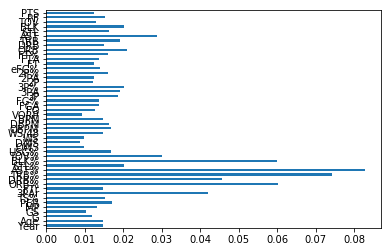

Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,365,63,12,1,3
2,68,252,95,9,6
3,16,102,201,61,16
4,2,24,94,248,111
5,2,5,12,110,258
6,0,0,0,4,3


In [20]:
random_forest(X,y)

In [3]:
NBA_Season_All=raw_df.drop(labels=['blank2','blanl','Unnamed: 0','Tm','Year','Player'], axis=1)

In [4]:
NBA_Season_All= NBA_Season_All.fillna(0)

In [ ]:
NBA_Season_All=raw_df.drop(labels=['blank2','blanl','Unnamed: 0','Tm','Year','Player'], axis=1)

In [13]:
NBA_Season_All.at[NBA_Season_All['Pos']=='PG', 'Pos'] = 1
NBA_Season_All.at[NBA_Season_All['Pos']=='PG-SG','Pos']= 1
NBA_Season_All.at[NBA_Season_All['Pos']=='PG-SF', 'Pos']= 1
NBA_Season_All.at[NBA_Season_All['Pos']=='SG', 'Pos']= 2
NBA_Season_All.at[NBA_Season_All['Pos']=='SG-PG', 'Pos']= 2
NBA_Season_All.at[NBA_Season_All['Pos']=='SG-SF', 'Pos']= 2
NBA_Season_All.at[NBA_Season_All['Pos']=='G', 'Pos']= 2
NBA_Season_All.at[NBA_Season_All['Pos']=='SF', 'Pos']= 3
NBA_Season_All.at[NBA_Season_All['Pos']=='SF-PG', 'Pos']= 3
NBA_Season_All.at[NBA_Season_All['Pos']=='SF-PF', 'Pos']= 3
NBA_Season_All.at[NBA_Season_All['Pos']=='SF-SG', 'Pos']= 3
NBA_Season_All.at[NBA_Season_All['Pos']=='F-G', 'Pos']= 3
NBA_Season_All.at[NBA_Season_All['Pos']=='F', 'Pos']= 3
NBA_Season_All.at[NBA_Season_All['Pos']=='G-F', 'Pos']= 3
NBA_Season_All.at[NBA_Season_All['Pos']=='PF', 'Pos']= 4
NBA_Season_All.at[NBA_Season_All['Pos']=='F-C', 'Pos']= 4
NBA_Season_All.at[NBA_Season_All['Pos']=='PF-SF', 'Pos']= 4
NBA_Season_All.at[NBA_Season_All['Pos']=='SG-PF', 'Pos']= 4
NBA_Season_All.at[NBA_Season_All['Pos']=='C', 'Pos']= 5
NBA_Season_All.at[NBA_Season_All['Pos']=='C-F', 'Pos']= 5
NBA_Season_All.at[NBA_Season_All['Pos']=='PF-C', 'Pos']= 6
NBA_Season_All.at[NBA_Season_All['Pos']=='C-PF', 'Pos']= 6
NBA_Season_All.at[NBA_Season_All['Pos']=='C-SF', 'Pos']= 6
# NBA_Season_All['Pos']=NBA_Season_All['Pos'].astype('float64')

In [14]:
list(NBA_Season_All['Pos'].unique())

[3, 2, 4, 1, 5, 0, 6]

In [52]:
NBA_Season_All.head()

,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,3,31.0,63.0,0.0,0.0,0.0,0.368,0.0,0.467,0.0,...,0.705,0.0,0.0,0.0,176.0,0.0,0.0,0.0,217.0,458.0
1,2,29.0,49.0,0.0,0.0,0.0,0.435,0.0,0.387,0.0,...,0.708,0.0,0.0,0.0,109.0,0.0,0.0,0.0,99.0,279.0
2,3,25.0,67.0,0.0,0.0,0.0,0.394,0.0,0.259,0.0,...,0.698,0.0,0.0,0.0,140.0,0.0,0.0,0.0,192.0,438.0
3,3,24.0,15.0,0.0,0.0,0.0,0.312,0.0,0.395,0.0,...,0.559,0.0,0.0,0.0,20.0,0.0,0.0,0.0,29.0,63.0
4,3,24.0,13.0,0.0,0.0,0.0,0.308,0.0,0.378,0.0,...,0.548,0.0,0.0,0.0,20.0,0.0,0.0,0.0,27.0,59.0


In [ ]:
# COME BACK AND FIGURE OUT WHY THIS CREATED NEW ONES AT THE END

In [7]:
# NBA_Season_All[NBA_Season_All['Pos']=='PG']= 1
NBA_Season_All.at['PG', 'Pos'] = 1
# NBA_Season_All[NBA_Season_All['Pos']=='PG-SG']= 1
# NBA_Season_All[NBA_Season_All['Pos']=='PG-SF']= 1
# NBA_Season_All[NBA_Season_All['Pos']=='SG']= 2
# NBA_Season_All[NBA_Season_All['Pos']=='SG-PG']= 2
# NBA_Season_All[NBA_Season_All['Pos']=='SG-SF']= 2
# NBA_Season_All[NBA_Season_All['Pos']=='G']= 2
# NBA_Season_All[NBA_Season_All['Pos']=='SF']= 3
# NBA_Season_All[NBA_Season_All['Pos']=='SF-PG']= 3
# NBA_Season_All[NBA_Season_All['Pos']=='SF-PF']= 3
# NBA_Season_All[NBA_Season_All['Pos']=='SF-SG']= 3
# NBA_Season_All[NBA_Season_All['Pos']=='F-G']= 3
# NBA_Season_All[NBA_Season_All['Pos']=='F']= 3
# NBA_Season_All[NBA_Season_All['Pos']=='G-F']= 3
# NBA_Season_All[NBA_Season_All['Pos']=='PF']= 4
# NBA_Season_All[NBA_Season_All['Pos']=='F-C']= 4
# NBA_Season_All[NBA_Season_All['Pos']=='PF-SF']= 4
# NBA_Season_All[NBA_Season_All['Pos']=='SG-PF']= 4
# NBA_Season_All[NBA_Season_All['Pos']=='C']= 5
# NBA_Season_All[NBA_Season_All['Pos']=='C-F']= 5
# NBA_Season_All[NBA_Season_All['Pos']=='PF-C']= 6
# NBA_Season_All[NBA_Season_All['Pos']=='C-PF']= 6
# NBA_Season_All[NBA_Season_All['Pos']=='C-SF']= 6
# NBA_Season_All['Pos']=NBA_Season_All['Pos'].astype('float64')

In [17]:
NBA_Season_All=NBA_Season_All.dropna()

In [18]:
y= NBA_Season_All['Pos']
X= NBA_Season_All.drop(['Pos'], axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

In [20]:
kmeans= KMeans(n_clusters=5)
kmeans.fit(X_train)
y_hat= kmeans.predict(X_train)


In [21]:
labels = kmeans.labels_

metrics.silhouette_score(X_train, labels, metric='euclidean')

0.4304124497973708

In [22]:
clf= RandomForestClassifier()
clf.fit(X_train, y_train)

/Users/gabrielblatstein/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
clf= RandomForestClassifier()
clf.fit(X_train, y_train)
preds= clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])
acc = accuracy_score(preds, y_test) * 100
print("Accuracy is :{0}".format(acc))

Predicted Result,0,1,2,3,4,5,6
Actual Result,,,,,,,
0,15,0,0,0,0,0,0
1,0,742,164,26,6,4,0
2,0,192,584,186,18,7,0
3,0,40,242,512,143,43,0
4,0,7,38,183,534,265,1
5,0,12,21,76,297,573,0
6,0,0,0,0,4,4,0


In [25]:
acc = accuracy_score(preds, y_test) * 100
print("Accuracy is :{0}".format(acc))

Accuracy is :59.93116015387731


In [109]:
features_list=pd.DataFrame(zip(X_train, clf.feature_importances_), columns=['Feature',"Rank"])
features_list.sort_values('Rank')

,Feature,Rank
0,Age,0.027628
1,G,0.046841
11,AST%,0.047663
12,STL%,0.050304
13,BLK%,0.052376
10,TRB%,0.053543
14,TOV%,0.054652
8,ORB%,0.055970
9,DRB%,0.056785
5,TS%,0.061663


<BarContainer object of 15 artists>

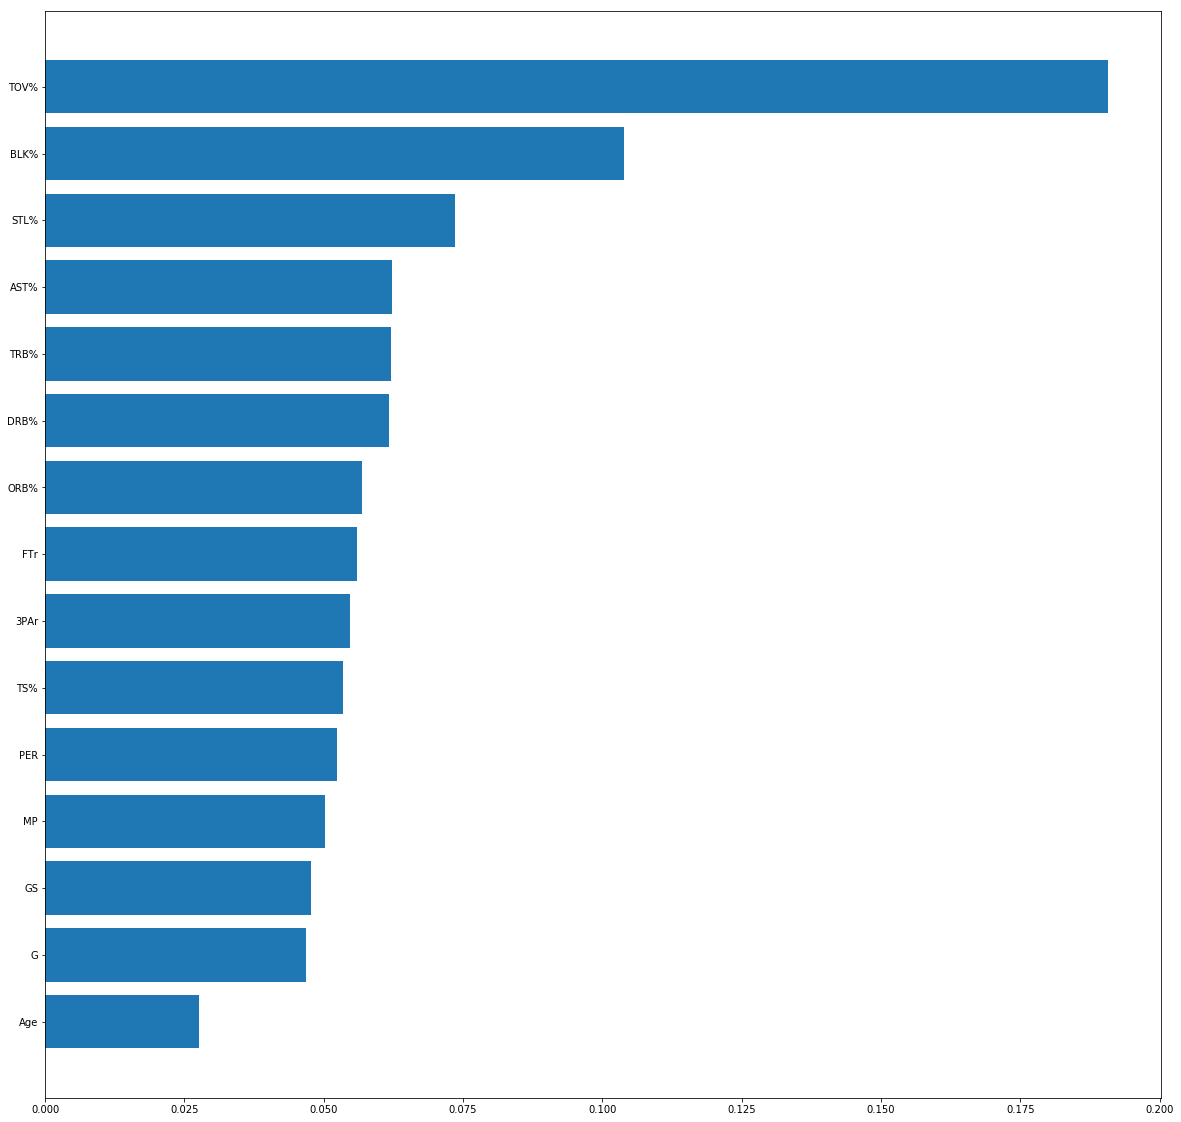

In [110]:
figure(figsize=(20,20))
plt.barh(y=features_list['Feature'], width=features_list['Rank'].sort_values(ascending=True))

AttributeError: 'Series' object has no attribute 'info'

In [50]:
y_train

20869    1
14646    4
13885    4
14379    5
7379     4
18770    2
2710     5
6200     4
20731    5
15804    5
4331     3
18264    2
15234    2
1459     0
8748     3
4969     5
17363    2
1576     3
14185    3
7618     5
19121    4
20702    4
2648     5
1158     3
15377    5
9262     3
18011    2
8032     5
9346     5
8572     5
        ..
613      4
760      1
17529    2
9756     3
18868    3
8682     5
21718    5
10563    1
8907     3
19616    2
10777    1
1910     1
16604    5
1962     5
21507    3
3866     1
11037    1
3570     1
6370     4
20092    5
9772     1
10212    2
18287    2
22973    1
13046    3
19595    2
21663    5
2118     2
12010    1
7486     2
Name: Pos, Length: 19752, dtype: category
Categories (24, object): [0, 1, 2, 3, ..., SF-SG, SG-PF, SG-PG, SG-SF]

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19752 entries, 20869 to 7486
Data columns (total 46 columns):
Age      19752 non-null float64
G        19752 non-null float64
GS       19752 non-null float64
MP       19752 non-null float64
PER      19752 non-null float64
TS%      19752 non-null float64
3PAr     19752 non-null float64
FTr      19752 non-null float64
ORB%     19752 non-null float64
DRB%     19752 non-null float64
TRB%     19752 non-null float64
AST%     19752 non-null float64
STL%     19752 non-null float64
BLK%     19752 non-null float64
TOV%     19752 non-null float64
USG%     19752 non-null float64
OWS      19752 non-null float64
DWS      19752 non-null float64
WS       19752 non-null float64
WS/48    19752 non-null float64
OBPM     19752 non-null float64
DBPM     19752 non-null float64
BPM      19752 non-null float64
VORP     19752 non-null float64
FG       19752 non-null float64
FGA      19752 non-null float64
FG%      19752 non-null float64
3P       19752 non-null 

In [27]:
NBA_Season=raw_df[raw_df['Year']== 2017]

In [28]:
NBA_Season.isna().sum()

Unnamed: 0      0
Year            0
Player          0
Pos             0
Age             0
Tm              0
G               0
GS              0
MP              0
PER             0
TS%             2
3PAr            2
FTr             2
ORB%            0
DRB%            0
TRB%            0
AST%            0
STL%            0
BLK%            0
TOV%            2
USG%            0
blanl         595
OWS             0
DWS             0
WS              0
WS/48           0
blank2        595
OBPM            0
DBPM            0
BPM             0
VORP            0
FG              0
FGA             0
FG%             2
3P              0
3PA             0
3P%            46
2P              0
2PA             0
2P%             5
eFG%            2
FT              0
FTA             0
FT%            24
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
dtype: int64

0        3.0
1        2.0
2        3.0
3        3.0
4        3.0
5        3.0
6        2.0
7        3.0
8        4.0
9        4.0
10       4.0
11       1.0
12       4.0
13       3.0
14       3.0
15       5.0
16       2.0
17       4.0
18       3.0
19       2.0
20       3.0
21       3.0
22       5.0
23       4.0
24       2.0
25       3.0
26       2.0
27       3.0
28       4.0
29       4.0
        ... 
24661    1.0
24662    1.0
24663    1.0
24664    4.0
24665    4.0
24666    4.0
24667    2.0
24668    2.0
24669    2.0
24670    4.0
24671    3.0
24672    3.0
24673    3.0
24674    3.0
24675    4.0
24676    3.0
24677    5.0
24678    4.0
24679    3.0
24680    4.0
24681    1.0
24682    2.0
24683    1.0
24684    2.0
24685    4.0
24686    4.0
24687    5.0
24688    5.0
24689    3.0
24690    5.0
Name: PTS, Length: 24691, dtype: float64

In [67]:
NBA_Season_All['Pos']

0        3.0
1        2.0
2        3.0
3        3.0
4        3.0
5        3.0
6        2.0
7        3.0
8        4.0
9        4.0
10       4.0
11       1.0
12       4.0
13       3.0
14       3.0
15       5.0
16       2.0
17       4.0
18       3.0
19       2.0
20       3.0
21       3.0
22       5.0
23       4.0
24       2.0
25       3.0
26       2.0
27       3.0
28       4.0
29       4.0
        ... 
24661    1.0
24662    1.0
24663    1.0
24664    4.0
24665    4.0
24666    4.0
24667    2.0
24668    2.0
24669    2.0
24670    4.0
24671    3.0
24672    3.0
24673    3.0
24674    3.0
24675    4.0
24676    3.0
24677    5.0
24678    4.0
24679    3.0
24680    4.0
24681    1.0
24682    2.0
24683    1.0
24684    2.0
24685    4.0
24686    4.0
24687    5.0
24688    5.0
24689    3.0
24690    5.0
Name: Pos, Length: 24691, dtype: float64

In [29]:
NBA_Season=NBA_Season.drop(labels=['blank2','blanl','Unnamed: 0','Tm','Year','Player'], axis=1)

In [30]:
NBA_Season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 24096 to 24690
Data columns (total 47 columns):
Pos      595 non-null object
Age      595 non-null float64
G        595 non-null float64
GS       595 non-null float64
MP       595 non-null float64
PER      595 non-null float64
TS%      593 non-null float64
3PAr     593 non-null float64
FTr      593 non-null float64
ORB%     595 non-null float64
DRB%     595 non-null float64
TRB%     595 non-null float64
AST%     595 non-null float64
STL%     595 non-null float64
BLK%     595 non-null float64
TOV%     593 non-null float64
USG%     595 non-null float64
OWS      595 non-null float64
DWS      595 non-null float64
WS       595 non-null float64
WS/48    595 non-null float64
OBPM     595 non-null float64
DBPM     595 non-null float64
BPM      595 non-null float64
VORP     595 non-null float64
FG       595 non-null float64
FGA      595 non-null float64
FG%      593 non-null float64
3P       595 non-null float64
3PA      595 non-nul

In [31]:
NBA_Season.fillna(0, inplace=True)

In [32]:
NBA_Season.isna().sum()

Pos      0
Age      0
G        0
GS       0
MP       0
PER      0
TS%      0
3PAr     0
FTr      0
ORB%     0
DRB%     0
TRB%     0
AST%     0
STL%     0
BLK%     0
TOV%     0
USG%     0
OWS      0
DWS      0
WS       0
WS/48    0
OBPM     0
DBPM     0
BPM      0
VORP     0
FG       0
FGA      0
FG%      0
3P       0
3PA      0
3P%      0
2P       0
2PA      0
2P%      0
eFG%     0
FT       0
FTA      0
FT%      0
ORB      0
DRB      0
TRB      0
AST      0
STL      0
BLK      0
TOV      0
PF       0
PTS      0
dtype: int64

In [33]:
NBA_Season.loc[NBA_Season['Pos']=='PG', 'Pos']= 1
NBA_Season.loc[NBA_Season['Pos']=='SG', 'Pos']= 2
NBA_Season.loc[NBA_Season['Pos']=='SF', 'Pos']= 3
NBA_Season.loc[NBA_Season['Pos']=='PF', 'Pos']= 4
NBA_Season.loc[NBA_Season['Pos']=='C', 'Pos']= 5
NBA_Season.loc[NBA_Season['Pos']=='PF-C', 'Pos']= 6
NBA_Season['Pos']=NBA_Season['Pos'].astype('category')

In [34]:
NBA_Season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 24096 to 24690
Data columns (total 47 columns):
Pos      595 non-null category
Age      595 non-null float64
G        595 non-null float64
GS       595 non-null float64
MP       595 non-null float64
PER      595 non-null float64
TS%      595 non-null float64
3PAr     595 non-null float64
FTr      595 non-null float64
ORB%     595 non-null float64
DRB%     595 non-null float64
TRB%     595 non-null float64
AST%     595 non-null float64
STL%     595 non-null float64
BLK%     595 non-null float64
TOV%     595 non-null float64
USG%     595 non-null float64
OWS      595 non-null float64
DWS      595 non-null float64
WS       595 non-null float64
WS/48    595 non-null float64
OBPM     595 non-null float64
DBPM     595 non-null float64
BPM      595 non-null float64
VORP     595 non-null float64
FG       595 non-null float64
FGA      595 non-null float64
FG%      595 non-null float64
3P       595 non-null float64
3PA      595 non-n

In [133]:
y= NBA_Season['Pos']
X= NBA_Season.drop(['Pos'], axis=1)

In [134]:
k_means= KMeans(n_clusters=5)
k_means.fit(X)
y_hat= k_means.predict(X)

In [135]:
labels = k_means.labels_

metrics.silhouette_score(X, labels, metric='euclidean')


0.44829216960137935

In [136]:
metrics.calinski_harabaz_score(X, labels) 

1241.0956736727724

In [137]:
k_means= KMeans(n_clusters=6)
k_means.fit(X)
y_hat= k_means.predict(X)

In [138]:
labels= k_means.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.4217717809465478

[2, 4, 5, 3, 1, 6]
Categories (6, int64): [2, 4, 5, 3, 1, 6]

## Random Forest

In [139]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.2)

In [140]:
# y_train= y_train.astype(int)

In [141]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

/Users/gabrielblatstein/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [142]:
preds= clf.predict(X_test)

In [143]:
pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,22,4,1,1,0
2,6,7,2,5,0
3,1,8,6,9,0
4,0,0,3,8,8
5,0,1,1,2,24


In [144]:
features_list=pd.DataFrame(zip(X_train, clf.feature_importances_), columns=['Feature',"Rank"])


In [145]:
features_list=features_list.sort_values('Rank', ascending= False)

In [147]:
features_list

,Feature,Rank
10,TRB%,0.099974
8,ORB%,0.080629
11,AST%,0.078627
9,DRB%,0.053718
29,3P%,0.045156
14,TOV%,0.040566
6,3PAr,0.031386
4,PER,0.027793
13,BLK%,0.025429
26,FG%,0.023468


In [148]:
acc = accuracy_score(preds, y_test) * 100
print("Accuracy is :{0}".format(acc))

Accuracy is :56.30252100840336


<BarContainer object of 46 artists>

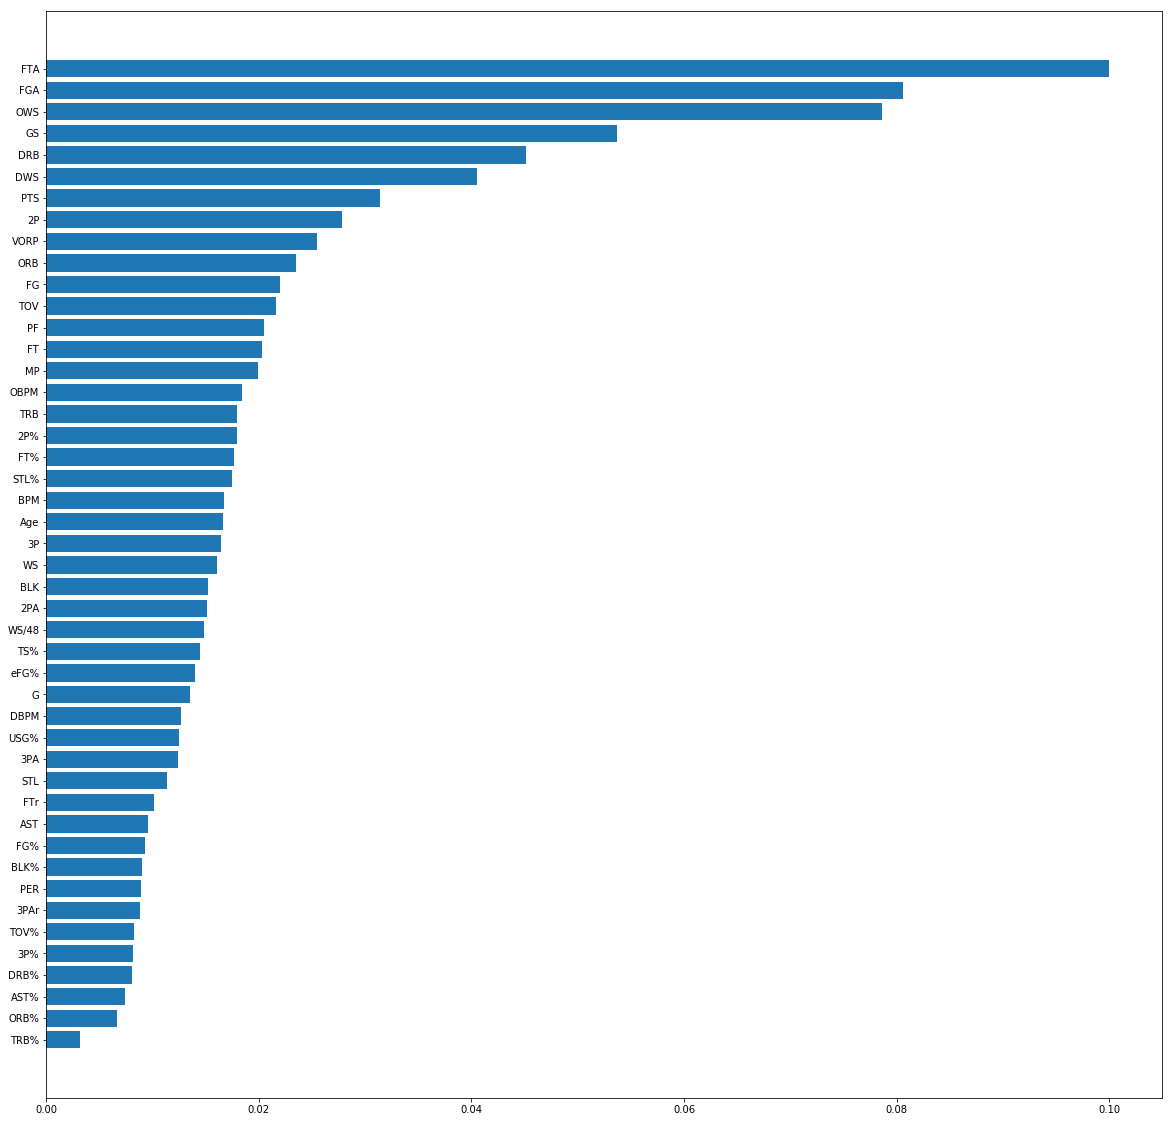

In [156]:
from matplotlib.pyplot import figure
figure(figsize=(20,20))
plt.barh(y=features_list['Feature'], width=features_list['Rank'].sort_values(ascending=True))

In [155]:
features_list['Feature'][:10]

10    TRB%
8     ORB%
11    AST%
9     DRB%
29     3P%
14    TOV%
6     3PAr
4      PER
13    BLK%
26     FG%
Name: Feature, dtype: object

In [158]:
NBA_Season_All

,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,3,31.0,63.0,0.0,0.0,0.0,0.368,0.000,0.467,0.0,...,0.705,0.0,0.0,0.0,176.0,0.0,0.0,0.0,217.0,458.0
1,2,29.0,49.0,0.0,0.0,0.0,0.435,0.000,0.387,0.0,...,0.708,0.0,0.0,0.0,109.0,0.0,0.0,0.0,99.0,279.0
2,3,25.0,67.0,0.0,0.0,0.0,0.394,0.000,0.259,0.0,...,0.698,0.0,0.0,0.0,140.0,0.0,0.0,0.0,192.0,438.0
3,3,24.0,15.0,0.0,0.0,0.0,0.312,0.000,0.395,0.0,...,0.559,0.0,0.0,0.0,20.0,0.0,0.0,0.0,29.0,63.0
4,3,24.0,13.0,0.0,0.0,0.0,0.308,0.000,0.378,0.0,...,0.548,0.0,0.0,0.0,20.0,0.0,0.0,0.0,27.0,59.0
5,3,24.0,2.0,0.0,0.0,0.0,0.376,0.000,0.750,0.0,...,0.667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
6,2,22.0,60.0,0.0,0.0,0.0,0.422,0.000,0.301,0.0,...,0.762,0.0,0.0,0.0,233.0,0.0,0.0,0.0,132.0,895.0
7,3,23.0,3.0,0.0,0.0,0.0,0.275,0.000,0.313,0.0,...,0.000,0.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,10.0
8,4,28.0,65.0,0.0,0.0,0.0,0.346,0.000,0.395,0.0,...,0.651,0.0,0.0,0.0,163.0,0.0,0.0,0.0,273.0,661.0
9,4,28.0,36.0,0.0,0.0,0.0,0.362,0.000,0.480,0.0,...,0.632,0.0,0.0,0.0,75.0,0.0,0.0,0.0,140.0,382.0


In [162]:
NBA_RFC=NBA_Season_All[['TRB%', 'ORB%','AST%','DRB%','3P%','TOV%','3PAr','PER','BLK%','FG%','Pos']]

In [164]:
y= NBA_RFC['Pos']
X=NBA_RFC.drop(['Pos'], axis=1)

In [125]:
Features_top_15=features_list.sort_values(features_list['Rank'] ,ascending=True)

KeyError: 0     0.008824
1     0.009231
2     0.011617
3     0.010305
4     0.010934
5     0.010065
6     0.075748
7     0.020696
8     0.070416
9     0.063331
10    0.082448
11    0.078351
12    0.015073
13    0.058590
14    0.034313
15    0.018691
16    0.011865
17    0.010626
18    0.011365
19    0.017866
20    0.013814
21    0.023197
22    0.018831
23    0.010652
24    0.007405
25    0.013295
26    0.027208
27    0.021309
28    0.019431
29    0.012458
30    0.009178
31    0.008829
32    0.021884
33    0.012013
34    0.008366
35    0.016009
36    0.015048
37    0.007267
38    0.014909
39    0.009764
40    0.023037
41    0.010572
42    0.014627
43    0.008579
44    0.012767
45    0.009193
Name: Rank, dtype: float64

In [165]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2)
clf= RandomForestClassifier()
clf.fit(X_train, y_train)

preds= clf.predict(X_test)



/Users/gabrielblatstein/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [166]:
pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1,2,3,4,5,6
Actual Result,,,,,,,
0,10,0,0,0,0,0,0
1,1,715,150,45,17,4,0
2,0,210,548,198,36,22,0
3,1,47,231,494,174,57,0
4,3,17,39,190,498,256,1
5,0,13,33,74,277,564,2
6,0,1,0,1,4,6,0


In [168]:
acc_score= accuracy_score(preds, y_test)
acc_score

0.5727880137679692

## Decision Tree

## Feature Selection

### Using PCA

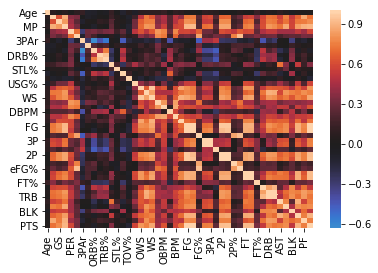

In [57]:
import seaborn as sns
features= X
sns.heatmap(X.corr(), center=0)

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)
#47 total features
pca_1= PCA(n_components= 7)
pca_2= PCA(n_components= 10)
pca_3= PCA(n_components= 15)

principleComponents= pca_1.fit_transform(X_scaled)
principleComponents= pca_2.fit_transform(X_scaled)
principleComponents= pca_3.fit_transform(X_scaled)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

0.8109236248367936
0.8740865804103138
0.9426786939895855


In [76]:
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(X_scaled)
print(np.sum(pca.explained_variance_ratio_))

0.9426787057082735


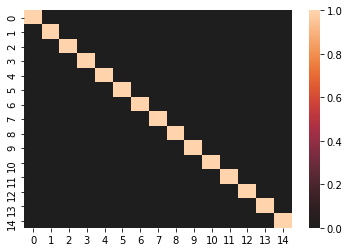

In [77]:
sns.heatmap(pd.DataFrame(principalComponents).corr(), center=0)

## PCA for Kmeans

In [99]:
from sklearn.pipeline import Pipeline
pca=PCA(n_components=15)
clf= KMeans(n_clusters=5)
X_pca_test= pca.fit_transform(X_test)
X_pca_train= pca.fit_transform(X_train)
clf.fit(X_pca_train)

labels = clf.labels_

metrics.silhouette_score(X_pca_train, labels, metric='euclidean')

0.4540224450981032

StandardScaler(copy=True, with_mean=True, with_std=True)

In [100]:
clf.fit(X_pca_test)
labels_test= clf.labels_

metrics.silhouette_score(X_pca_test, labels_test, metric='euclidean')

0.4826752137603459

## PCA for Random Forest

In [105]:
clf= RandomForestClassifier(criterion='entropy')
clf.fit(X_pca_train, y_train)

preds= clf.predict(X_pca_test)


/Users/gabrielblatstein/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [169]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [106]:
pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,10,8,2,1,0
2,13,7,1,1,1
3,6,3,4,6,4
4,7,5,3,3,4
5,9,4,2,8,7


In [107]:
acc = accuracy_score(preds, y_test) * 100
print("Accuracy is :{0}".format(acc))

Accuracy is :26.05042016806723


In [82]:
np.sum(pipe_kmeans.predict(X_test) == y_test)/len(y_test)

0.16806722689075632

## Adv. Modeling

1. Preprocessed Data (Check)
2. Subset Data aka Choose 10 Features 
3. Train Test Split
4. Build the Model
    a. Tune the Model
    b. Pipeline
    c. Grid Search
5. Predict
6. Check Accuracy

Also want to basically feed in a single unmarked player and see what it tells me their position is maybe like a college player
